# Introduction
 The aviation industry, while statistically one of the safest modes of transportation, is not without its risks. Understanding the patterns and causes of aviation accidents is critical for enhancing flight safety and informing regulatory decisions. This analysis explores a comprehensive dataset of aviation accidents, focusing on key variables such as the date and phase of flight, aircraft make and model, and fatality counts. Through exploratory data analysis and visualization techniques, we aim to uncover trends over time, identify high-risk aircraft types and flight phases, and distinguish between fatal and non-fatal incidents. The ultimate goal is to derive actionable insights that can guide safety improvements, training, and policy-making in the aviation sector.

# Set up the environment
we will first import all the relevant libraries will need to use during our analysis with their standard alias.
i will use:
1. pandas
2. matplotlib.pyplot
3. numpy
4. seaborn

In [164]:
#import libraries with standard alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load the DataSet
Using pandas, read into the dataset in the Data folder containg a csv file with data regarding aircraft accidents

In [165]:
### 2. LOAD THE DATASET
# will read into the csv file and store it in a variable called df and print out the first 5 rows to check out data and columns contained
df = pd.read_csv('Data/AviationData.csv', encoding='latin1')
pd.set_option('display.max_columns', None)
# to display all columns in the dataframe

df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_8564\2005587428.py:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Understanding the main DataFrame
We will do alittle explotrartion to understand the data we have and what it contains to check what we are working with.

In [166]:
# remove any "-" and replacing with NaN values
df.replace("-", np.nan, inplace=True)

#checking the data info in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50247 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [167]:
#calculating measure of central tendancies in the numerical columns in the dataframe
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [168]:
#checking the names of the columns in the dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [169]:
#check the shape and no rows of the dataframe
df.shape

(88889, 31)

The data set is a dataframe that has 8889 rows and 31 columns with some have null values. we are futher going to clean the data to remove the null values, duplicates and any anomalies before we can find the measure of central tendancies of our data. with most data being objects and floats.
Columns with Numerical data are 5.

### Reducing number of columns
The columns in the dataframe are 31 and some are irrelevant to the goal of my study. i will reduce the number of columns to 12 columns to include;
i. Event date - Important as it will tell when the accident occured.
ii. Location/Country - Where the accident occurred.
iii. Make/Model - This is key as the main objective of the study is to determine an aircraft to purchase, one that is safe and not prone to accidents.
iv. Injury sevierity/Total Fatal, minor and no Injuries - To check on the injuries.
v. Aircraft Damage - The extent of the damage of the aircraft. Can it be salvaged after the accident? this is also key.
vi. Broad phase of the flight - This shows when the flight was involved in the accident, was it landing or taking off.
vii. Weather Conditions
viii. Purpose of flight - Was the flight personal or commercial.
This 12 columns will help paint a better picture for my client thus helping them make a better decision.

In [170]:
# Creating a copy of the dataframe with relevant columns to be used in the analysis
Aviation_Analysisdf = df[['Event.Date', 'Location', 'Country', 'Make', 'Model', 'Total.Fatal.Injuries', 'Total.Minor.Injuries','Total.Uninjured','Aircraft.damage','Broad.phase.of.flight', 'Weather.Condition','Purpose.of.flight']]
Aviation_Analysisdf.info()
Aviation_Analysisdf.shape
Aviation_Analysisdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Date             88889 non-null  object 
 1   Location               88837 non-null  object 
 2   Country                88663 non-null  object 
 3   Make                   88826 non-null  object 
 4   Model                  88797 non-null  object 
 5   Total.Fatal.Injuries   77488 non-null  float64
 6   Total.Minor.Injuries   76956 non-null  float64
 7   Total.Uninjured        82977 non-null  float64
 8   Aircraft.damage        85695 non-null  object 
 9   Broad.phase.of.flight  61724 non-null  object 
 10  Weather.Condition      84397 non-null  object 
 11  Purpose.of.flight      82697 non-null  object 
dtypes: float64(3), object(9)
memory usage: 8.1+ MB


,Event.Date,Location,Country,Make,Model,Total.Fatal.Injuries,Total.Minor.Injuries,Total.Uninjured,Aircraft.damage,Broad.phase.of.flight,Weather.Condition,Purpose.of.flight
0,1948-10-24,"MOOSE CREEK, ID",United States,Stinson,108-3,2.0,0.0,0.0,Destroyed,Cruise,UNK,Personal
1,1962-07-19,"BRIDGEPORT, CA",United States,Piper,PA24-180,4.0,0.0,0.0,Destroyed,Unknown,UNK,Personal
2,1974-08-30,"Saltville, VA",United States,Cessna,172M,3.0,NaN,NaN,Destroyed,Cruise,IMC,Personal
3,1977-06-19,"EUREKA, CA",United States,Rockwell,112,2.0,0.0,0.0,Destroyed,Cruise,IMC,Personal
4,1979-08-02,"Canton, OH",United States,Cessna,501,1.0,NaN,0.0,Destroyed,Approach,VMC,Personal


# Data Cleaning
Will convert the data in the event column to proper date format and  remove all missing data

In [171]:
Aviation_Analysisdf = Aviation_Analysisdf.copy()

In [172]:
#converting date on event.date column to datetime format.
Aviation_Analysisdf['Event.Date'] = pd.to_datetime(Aviation_Analysisdf['Event.Date'], errors='coerce')


In [173]:
#checking for missing values in the dataframe
Aviation_Analysisdf.isnull().sum()

Event.Date                   0
Location                    52
Country                    226
Make                        63
Model                       92
Total.Fatal.Injuries     11401
Total.Minor.Injuries     11933
Total.Uninjured           5912
Aircraft.damage           3194
Broad.phase.of.flight    27165
Weather.Condition         4492
Purpose.of.flight         6192
dtype: int64

In [174]:
#see the data with the most missing values to be dropped
Aviation_Analysisdf.isnull().sum().sort_values(ascending=False)

Broad.phase.of.flight    27165
Total.Minor.Injuries     11933
Total.Fatal.Injuries     11401
Purpose.of.flight         6192
Total.Uninjured           5912
Weather.Condition         4492
Aircraft.damage           3194
Country                    226
Model                       92
Make                        63
Location                    52
Event.Date                   0
dtype: int64

In [175]:
#percentage of missing values in the dataframe
missing_percent = Aviation_Analysisdf.isnull().mean().sort_values(ascending = False) * 100

### create a bar graph of the missing data
the Bar graph will help clearly see data with missing values and give actions on weather to drop or fill

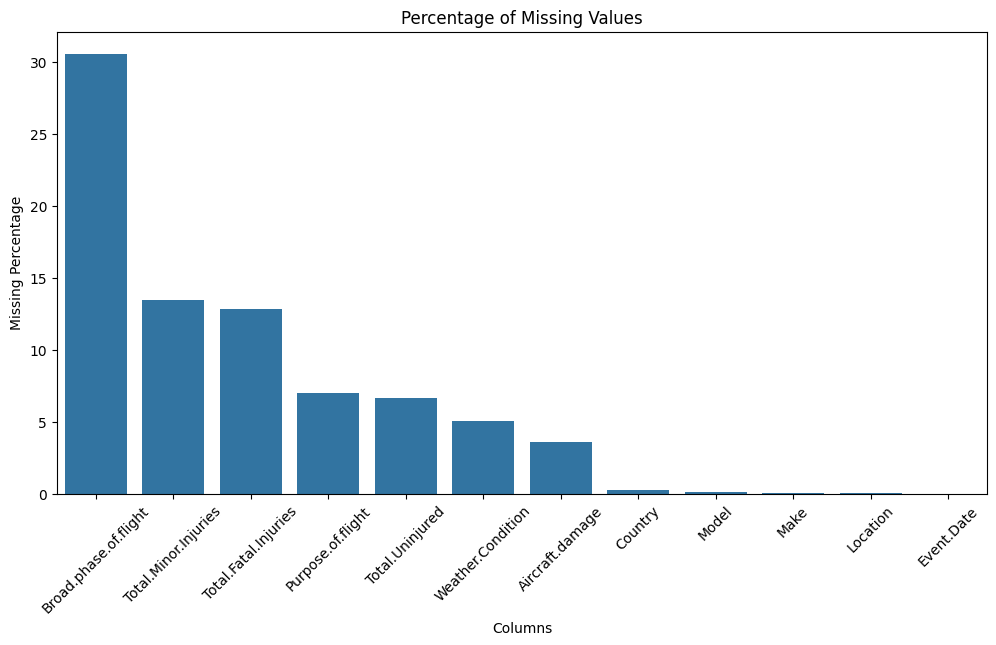

In [176]:
#creating a bar plot to visualize the percentage of missing values in the dataframe
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.title('Percentage of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45)
plt.show()

In [177]:
#drop missing data in Broad.phase.of.flight
Aviation_Analysisdf.dropna(subset=['Broad.phase.of.flight'], inplace=True)

In [178]:
#filling missing values in the Total.Fatal.Injuries, Total.Minor.Injuries, and Total.Uninjured columns with '0'
Aviation_Analysisdf['Total.Fatal.Injuries'].fillna(0, inplace=True)
Aviation_Analysisdf['Total.Minor.Injuries'].fillna(0, inplace=True)
Aviation_Analysisdf['Total.Uninjured'].fillna(0, inplace=True)

In [179]:
#fill missing values in the Aircraft.damage, purpose.of.flight, weather.condition and country columns with 'Unknown'
Aviation_Analysisdf['Aircraft.damage'].fillna('Unknown', inplace=True)
Aviation_Analysisdf['Purpose.of.flight'].fillna('Unknown', inplace=True)
Aviation_Analysisdf['Weather.Condition'].fillna('Unknown', inplace=True)
Aviation_Analysisdf['Country'].fillna('Unknown', inplace=True)

# Data Exploration and Analysis
in this section i will be answering the following questions:
i. Which aircraft models have the highest or lowest fatal accident rates?
ii. How do accident severities vary by make/model?
iii. What are the most common phases of flight during accidents?
 iv. How have accidents changed over time?

 I will use the cleaned dataframe "Aviation_Analysisdf"

In [180]:
#quick overview of the data after cleaning
Aviation_Analysisdf.info()
#checking the shape of the dataframe after cleaning
Aviation_Analysisdf.shape
#checking the first 5 rows of the dataframe after cleaning
Aviation_Analysisdf.head()
#checking the data types of the columns in the dataframe after cleaning
Aviation_Analysisdf.dtypes
#checcking the measure of central tendancies in the numerical columns in the dataframe after cleaning
Aviation_Analysisdf.describe()
#checcking for null values in the dataframe after cleaning
Aviation_Analysisdf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61724 entries, 0 to 63911
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Date             61724 non-null  datetime64[ns]
 1   Location               61710 non-null  object        
 2   Country                61724 non-null  object        
 3   Make                   61713 non-null  object        
 4   Model                  61694 non-null  object        
 5   Total.Fatal.Injuries   61724 non-null  float64       
 6   Total.Minor.Injuries   61724 non-null  float64       
 7   Total.Uninjured        61724 non-null  float64       
 8   Aircraft.damage        61724 non-null  object        
 9   Broad.phase.of.flight  61724 non-null  object        
 10  Weather.Condition      61724 non-null  object        
 11  Purpose.of.flight      61724 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 6.

Event.Date                0
Location                 14
Country                   0
Make                     11
Model                    30
Total.Fatal.Injuries      0
Total.Minor.Injuries      0
Total.Uninjured           0
Aircraft.damage           0
Broad.phase.of.flight     0
Weather.Condition         0
Purpose.of.flight         0
dtype: int64

In [181]:
#Fill missing values in the Make, Model column with "unknown"
Aviation_Analysisdf['Make'].fillna('unknown', inplace=True)   
Aviation_Analysisdf['Model'].fillna('unknown', inplace=True)

#check for dulicates in the dataframe
Aviation_Analysisdf.duplicated().sum()

28

In [182]:
#checking the shape of the dataframe after dropping duplicates
Aviation_Analysisdf.shape

#checking the first 5 rows of the dataframe after dropping duplicates
Aviation_Analysisdf.head()

#Overview of the data after dropping duplicates
Aviation_Analysisdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61724 entries, 0 to 63911
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Date             61724 non-null  datetime64[ns]
 1   Location               61710 non-null  object        
 2   Country                61724 non-null  object        
 3   Make                   61724 non-null  object        
 4   Model                  61724 non-null  object        
 5   Total.Fatal.Injuries   61724 non-null  float64       
 6   Total.Minor.Injuries   61724 non-null  float64       
 7   Total.Uninjured        61724 non-null  float64       
 8   Aircraft.damage        61724 non-null  object        
 9   Broad.phase.of.flight  61724 non-null  object        
 10  Weather.Condition      61724 non-null  object        
 11  Purpose.of.flight      61724 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 6.

# Visualization
Plot a graph to show total no. of accidents per year
this will help in answering my question no. 4 in my data exploration

In [183]:
#checking the data types of the event.date column in the dataframe
Aviation_Analysisdf['Event.Date'].dtypes

dtype('<M8[ns]')

In [184]:
#checking information about the Event.Date column in the dataframe
Aviation_Analysisdf['Event.Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 61724 entries, 0 to 63911
Series name: Event.Date
Non-Null Count  Dtype         
--------------  -----         
61724 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 964.4 KB


C:\Users\user\AppData\Local\Temp\ipykernel_8564\1938266805.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette='viridis', legend =False)


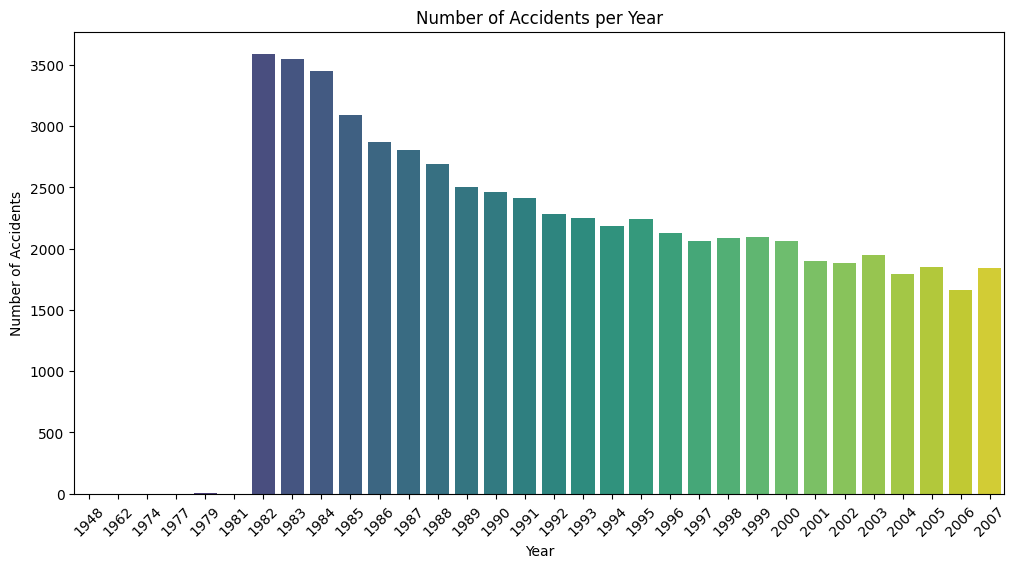

In [185]:
#plotting the number of accidents per year bar graph
plt.figure(figsize=(12, 6))
# Extracting the year from the Event.Date column
Aviation_Analysisdf['Year'] = Aviation_Analysisdf['Event.Date'].dt.year 
# Grouping the data by year and counting the number of accidents
accidents_per_year = Aviation_Analysisdf['Year'].value_counts().sort_index()

sns.barplot(x=accidents_per_year.index, y=accidents_per_year.values, palette='viridis', legend =False)
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


As per the bar graph above, most accidents occured in the earlier years and kept on dropping with small variations in the later years of 2000s. 
Between 1948 - 1982 their were no accidents which could mean either there were completely none or documentations were poor thus no data during those years.

### Accidents caused by weather conditions
Plot a bar graph to show the number of accidents caused by weather conditions. this will help determine how weather conditions relate with the number of aircraft accidents.

In [186]:
#grouping data by weather condition and counting the number of accidents
weather_condition_counts = Aviation_Analysisdf['Weather.Condition'].value_counts().head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_8564\3556377912.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_condition_counts.index, y=weather_condition_counts.values, palette='viridis', legend=False)


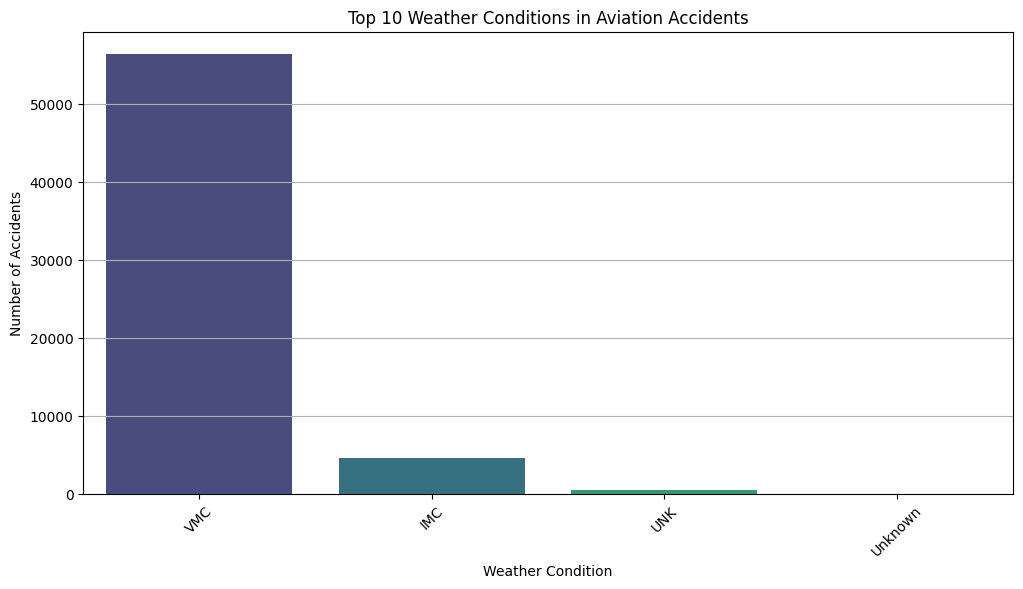

In [187]:
#Bar plot for accidents by weather condition
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_condition_counts.index, y=weather_condition_counts.values, palette='viridis', legend=False)
# Adding labels and title
plt.title('Top 10 Weather Conditions in Aviation Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('weather_conditions_accidents.png', bbox_inches='tight')
plt.show()


VMC was the number one cause of aircraft accidents with over 50,000 accidents.

### Fatal vs Non fatal accidents comparison
will do a comparison of the fatal vs none fatal accidents to see how much lives were lost as a result.

In [188]:
#creating a new column Fatal/Non-Fatal to classify the accidents into fatal and non-fatal
Aviation_Analysisdf['Accident_sevierity'] = df['Total.Fatal.Injuries'].apply(lambda x: 'Fatal' if x > 0 else 'Non-Fatal')

#counting the number of accidents in each category
accident_severity_counts = Aviation_Analysisdf['Accident_sevierity'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_8564\4278878821.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_severity_counts.index, y=accident_severity_counts.values, palette='Reds', legend=False)


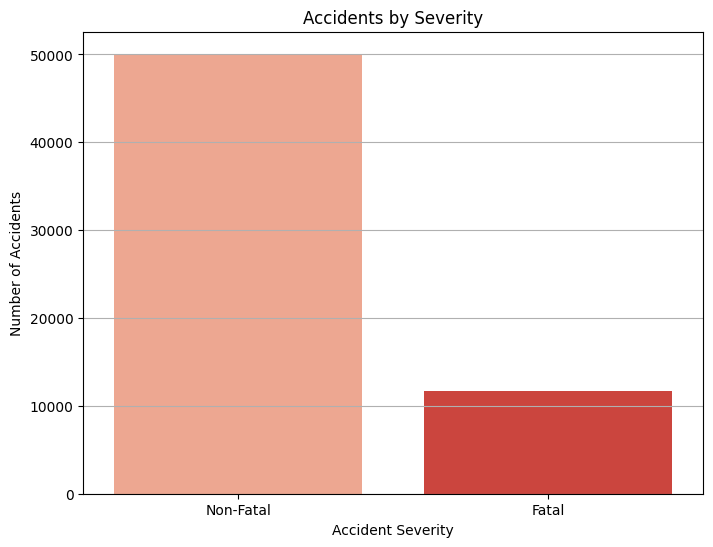

In [189]:
#plotting number of accidents by severity
plt.figure(figsize=(8, 6))
sns.barplot(x=accident_severity_counts.index, y=accident_severity_counts.values, palette='Reds', legend=False)
# Adding labels and title
plt.title('Accidents by Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.grid(axis='y')
plt.savefig('accidents_by_severity.png', bbox_inches='tight')
plt.show()

Most of the accidents were non-fatal at 50,000 accidents and slightly above 10,000 for fatal accidents.

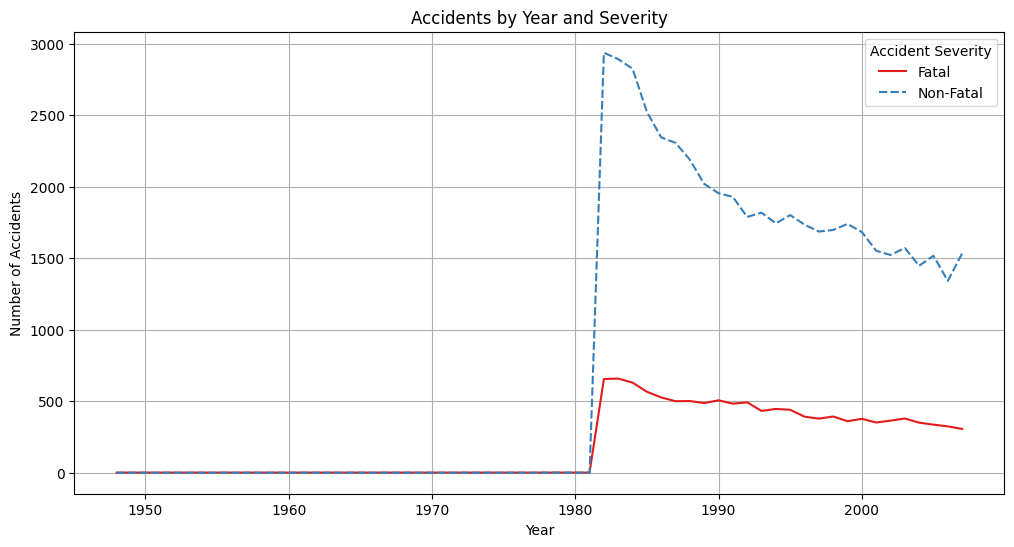

In [190]:
# grouping year and accident severity
accidents_by_year_severity = Aviation_Analysisdf.groupby(['Year', 'Accident_sevierity']).size().unstack(fill_value=0)
#plotting the number of accidents by year and severity
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_year_severity, palette='Set1')
plt.title('Accidents by Year and Severity')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.grid()
plt.savefig('accidents_by_year_severity.png', bbox_inches='tight')
plt.show()


### Plot to check aircraft models with highest or lowest fatal accidents

C:\Users\user\AppData\Local\Temp\ipykernel_8564\2327176327.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette='Blues', legend=False)


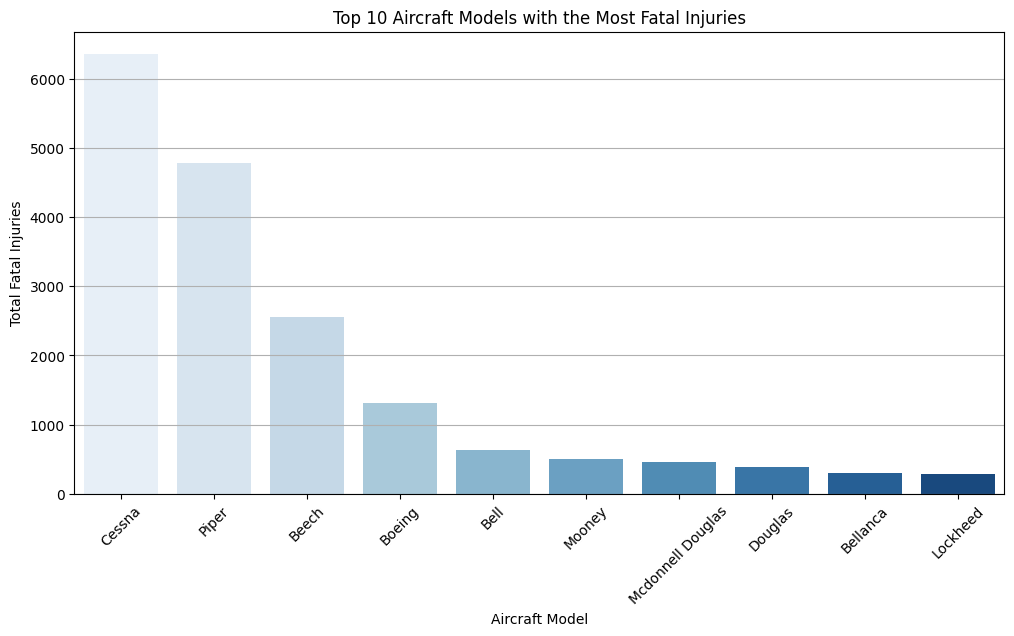

C:\Users\user\AppData\Local\Temp\ipykernel_8564\2327176327.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models_accidents.index, y=top_models_accidents.values, palette='Reds', legend=False)


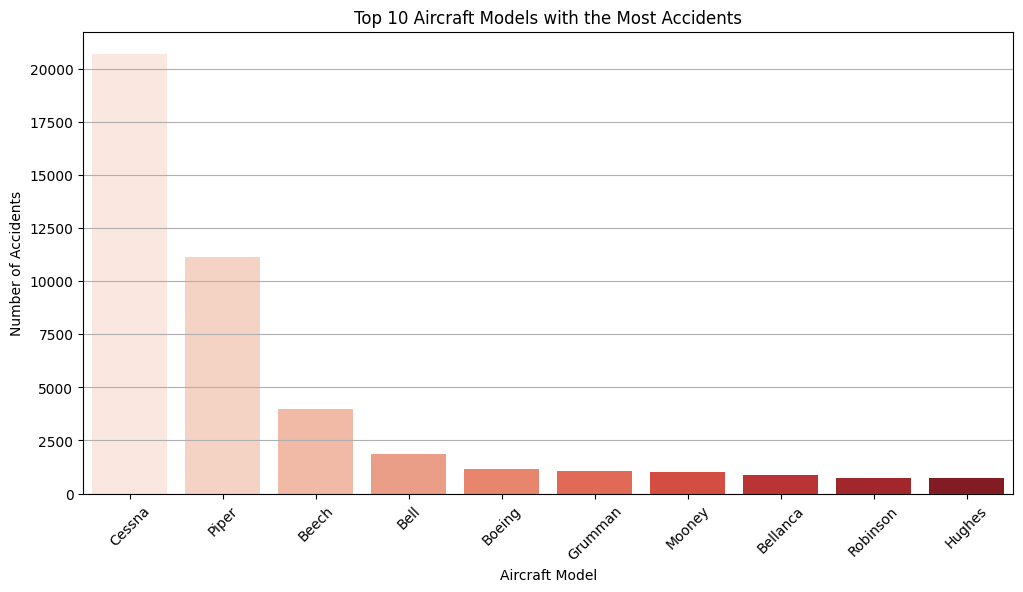

In [191]:
#filter total fatal injuries to extreme values
fataldf = Aviation_Analysisdf[Aviation_Analysisdf['Total.Fatal.Injuries'] > 0]

#grouping by aircraft model
top_models = (fataldf.groupby('Make')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10))

#plotting the top 10 aircraft models with the most fatal injuries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.index, y=top_models.values, palette='Blues', legend=False)
# Adding labels and title
plt.title('Top 10 Aircraft Models with the Most Fatal Injuries')
plt.xlabel('Aircraft Model')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('top_10_aircraft_models_fatal_injuries.png', bbox_inches='tight')
plt.show()

#grouping by aircraft model and counting the number of accidents
top_models_accidents = (Aviation_Analysisdf.groupby('Make')['Accident_sevierity'].count().sort_values(ascending=False).head(10))
#plotting the top 10 aircraft models with the most accidents
plt.figure(figsize=(12, 6))
sns.barplot(x=top_models_accidents.index, y=top_models_accidents.values, palette='Reds', legend=False)
# Adding labels and title
plt.title('Top 10 Aircraft Models with the Most Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('top_10_aircraft_models_accidents.png', bbox_inches='tight')
plt.show()



Cessana, Piper and Beech are the most accident prone aircraft models with fatal injuries.
Hughes and lockhead have the least accidents and fatal injuries respectively.

### Plot to check common phase of flight during accidents

In [192]:
#count phases of flight in the dataframe
phase_counts = Aviation_Analysisdf['Broad.phase.of.flight'].value_counts().head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_8564\1075163038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.index, y=phase_counts.values, palette='Greens', legend=False)


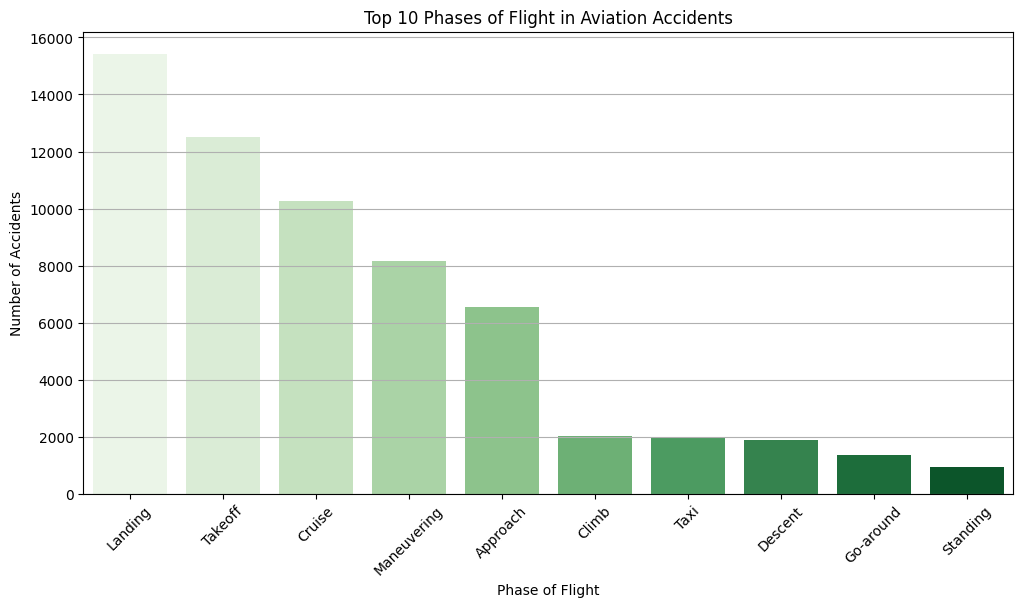

C:\Users\user\AppData\Local\Temp\ipykernel_8564\1075163038.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='Purples', legend=False)


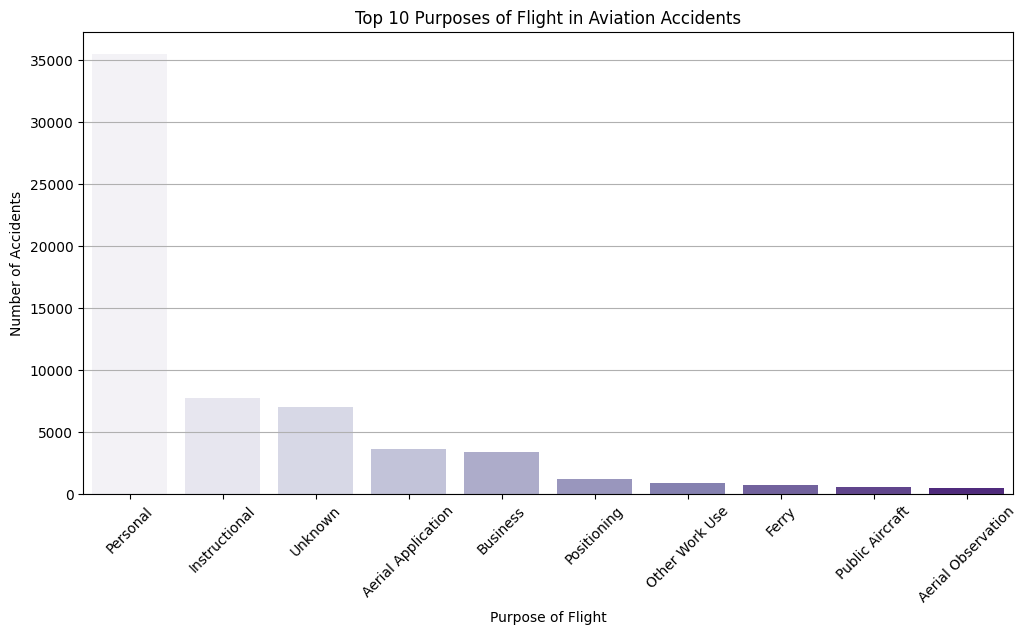

In [193]:
#plotting the top 10 phases of flight with the most accidents
plt.figure(figsize=(12, 6))
sns.barplot(x=phase_counts.index, y=phase_counts.values, palette='Greens', legend=False)
# Adding labels and title
plt.title('Top 10 Phases of Flight in Aviation Accidents')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('top_10_phases_of_flight_accidents.png', bbox_inches='tight')
plt.show()

#grouping by purpose of flight and counting the number of accidents
purpose_counts = Aviation_Analysisdf['Purpose.of.flight'].value_counts().head(10)
#plotting the top 10 purposes of flight with the most accidents
plt.figure(figsize=(12, 6))
sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='Purples', legend=False)
# Adding labels and title
plt.title('Top 10 Purposes of Flight in Aviation Accidents')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('top_10_purposes_of_flight_accidents.png', bbox_inches='tight')
plt.show()

Most of the aircraft accidents occur during takeoff and landing. 
Most of the fligts getting involved in accidents are personal and instructional flights.

# Recomendations
From data cleaning and analysis of the above data, i have come up with the following recomendations for the business;
1. Improve Safety During Critical Flight Phases
Insight: Most accidents occur during landing, takeoff, and approach phases. Thus its prudent to enhance pilot training and simulator scenarios specifically for critical flight phases. Also they should adopt automated landing aids and advanced warning systems to assist pilots.

2. Focus on Low-Risk Aircraft Makes/Models
Insight: Certain aircraft makes/models show higher fatal accident rates. It is key to prioritize targeted safety inspections and maintenance protocols for low-risk aircraft types.
They are also encouraged to retrofit or phase out models with persistently high accident records.

3. Weather-Aware Operations
Insight : Accidents often occur under adverse weather conditions.The business should have in place strengthened weather forecasting integration in flight planning. They should also invest in real-time weather alert systems and pilot decision support tools.

4. Monitor Temporal Trends
Insight: Fluctuations in accidents per year suggest underlying regulatory or operational factors.
The Business should investigate policy changes or industry events around years with spikes and regularly review and update aviation safety regulations based on trend shifts.

5. Targeted Efforts to Reduce Fatalities
Insight: Even a small percentage of accidents result in disproportionate fatalities. Thus, the business is required to have emergency preparedness training and passenger briefing enhancements. They should also improve on survivability technologies (e.g., crash-resistant fuel systems, better seatbelts, fire suppression).

6. Proactive Safety Audits
Insight: Repetitive causes or conditions may exist for recurring accident types.To succed in this industry, the business should conduct proactive audits of operators, airports, and aircraft with recurring issues. There is need also for them to adopt a  Safety Management Systems (SMS) across the board.

